# Quantifying The World - Case Study 1
### Satvik Ajmera
### Summer 2022

#### Your case study is to build a linear regression model using L1 or L2 regularization (or both) the task to predict the Critical Temperature as closely as possible. In addition, include in your write-up which variable carries the most importance. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
train = pd.read_csv("train.csv")
unique_m = pd.read_csv("unique_m.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [5]:
unique_m.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,0.008892,0.026772,0.061678,0.189889,0.028143,0.106246,0.009050,0.0,0.016042,0.258347,0.010919,0.156817,0.224782,0.006119,0.003191,0.153182,0.035323,0.090182,1.276751,0.014034,0.073997,0.082556,0.155197,0.078662,0.003940,0.0,0.007799,0.326909,0.177556,0.370901,0.442349,0.146367,0.002291,0.055325,0.068072,0.085034,0.007834,0.009152,0.049468,0.120994,0.101269,0.040491,0.004744,0.0,0.004129,0.568440,0.264953,0.030662,0.041494,0.039666,0.0,0.021992,0.017821,0.023959,0.002857,0.009536,0.008832,0.014217,0.008909,0.012716,0.026849,0.009168,0.036086,0.010424,0.038206,0.022512,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,0.101685,0.271606,1.126254,2.217277,0.466710,0.760821,0.119717,0.0,0.138187,0.902732,0.185651,2.728139,3.407763,0.254272,0.129449,0.713075,0.580672,0.982521,2.079375,0.403316,1.115005,1.021279,1.076049,0.676294,0.083907,0.0,0.121254,0.763625,0.429953,4.846459,4.848246,2.084302,0.064728,0.770327,1.005898,1.554018,0.167831,0.688729,0.521820,1.886951,1.839020,0.718043,0.088480,0.0,0.077676,0.983288,2.320822,0.173147,1.282059,0.224657,0.0,0.183173,0.151433,0.155860,0.064737,0.104153,0.098728,0.131417,0.130455,0.214806,0.276861,0.208969,0.851380,0.164628,1.177476,0.282265,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [6]:
train.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,41.448045,769.614748,870.442317,737.474751,832.769649,1.299172,0.926726,572.222612,483.517264,215.631279,224.050033,157.983101,134.720039,144.448738,120.989330,1.267756,1.131138,139.325025,51.369885,51.601267,52.340465,6111.465214,5267.188547,3460.692235,3117.241110,1.072425,0.856037,8665.438818,2902.736814,3416.910784,3319.170628,76.879751,92.717486,54.359502,72.416225,1.070250,0.770757,120.730514,59.332637,48.912207,44.409356,14.296113,13.848001,10.136977,10.141161,1.093343,0.914065,21.138994,8.218528,8.323333,7.717576,89.706911,81.549080,29.841727,27.308061,0.727630,0.539991,250.893443,62.033066,98.943993,96.234051,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,19.983544,87.488694,143.278200,78.327275,119.772520,0.381935,0.334018,309.614442,224.042874,109.966774,127.927104,20.147288,28.801567,22.090958,35.837843,0.375411,0.407159,67.272228,35.019356,22.898396,25.294524,2846.785185,3221.314506,3703.256370,3975.122587,0.342356,0.319761,4097.126831,2398.471020,1673.624915,1611.799629,27.701890,32.276387,29.007425,31.648444,0.343391,0.285986,58.700327,28.620

In [7]:
X = train.iloc[:, 0:81]
y = train.critical_temp.values

In [8]:
X.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1010.544286,718.152900,938.512

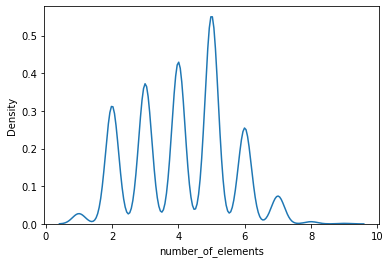

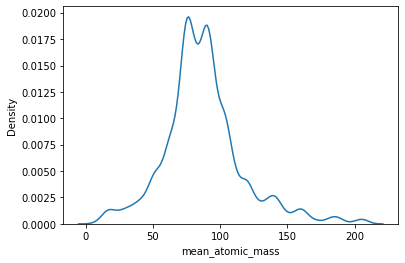

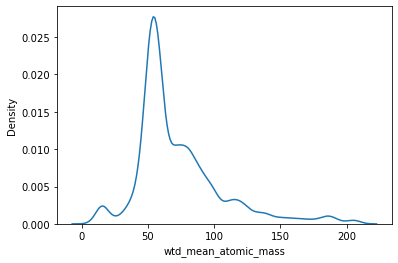

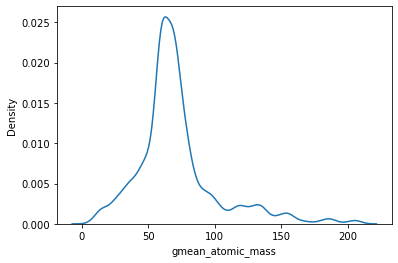

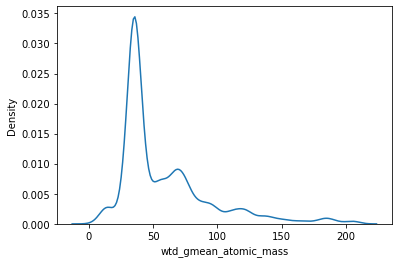

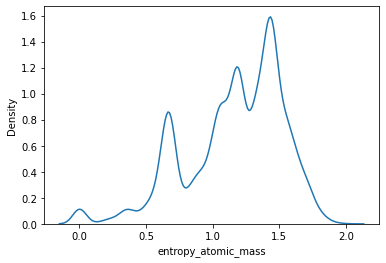

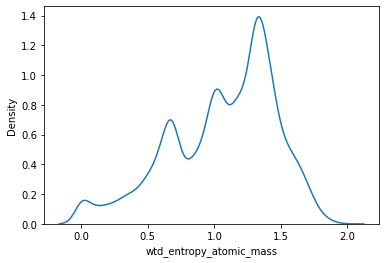

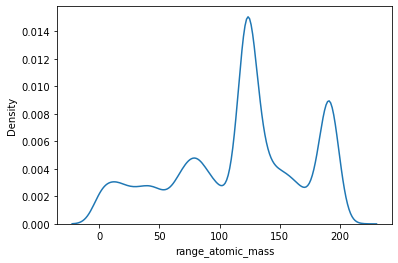

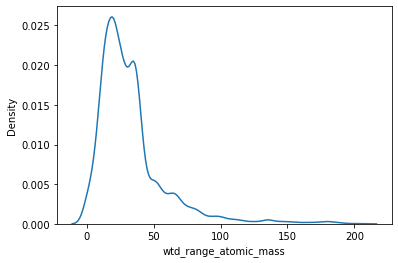

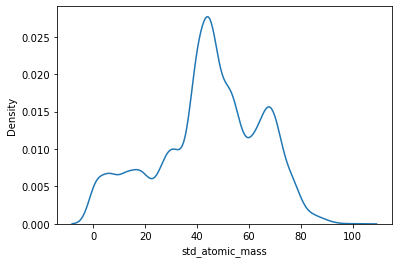

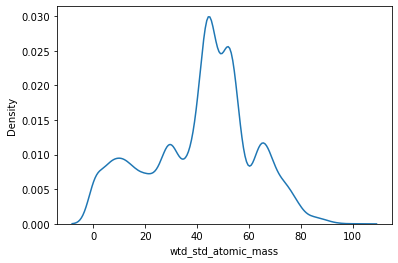

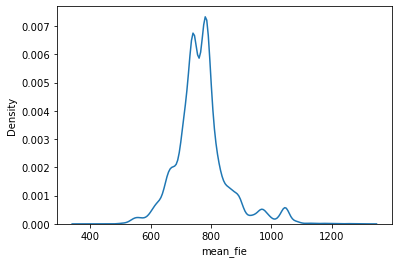

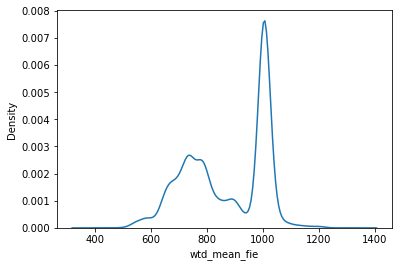

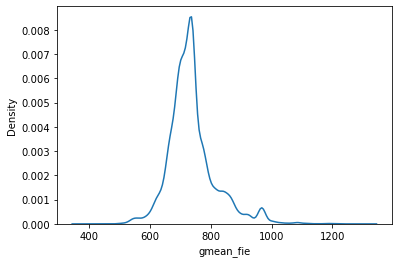

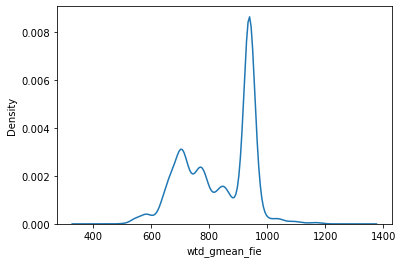

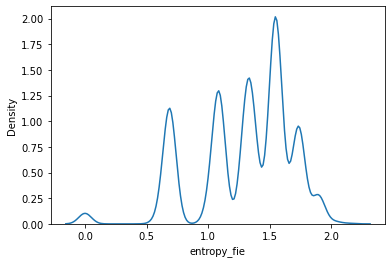

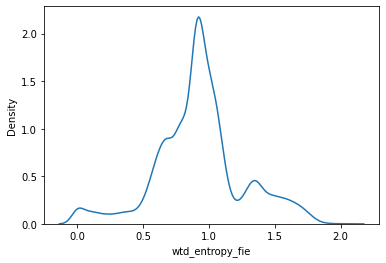

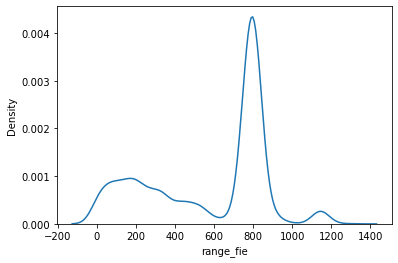

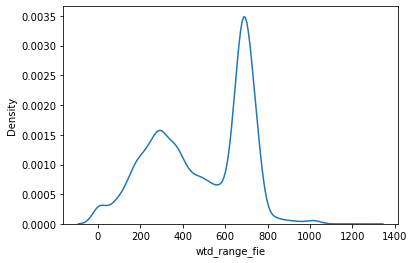

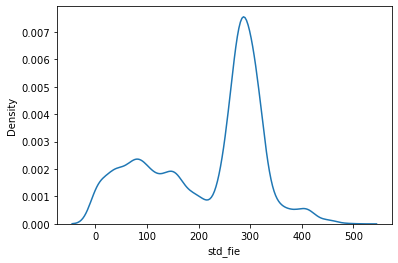

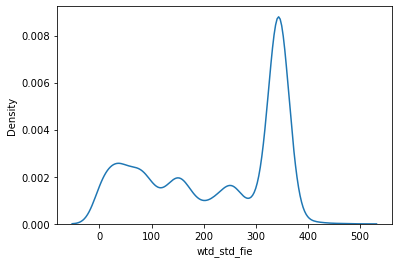

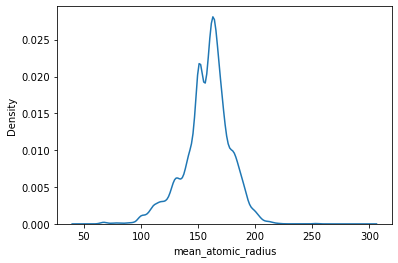

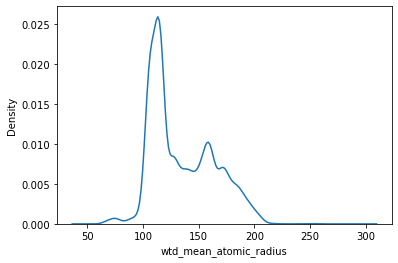

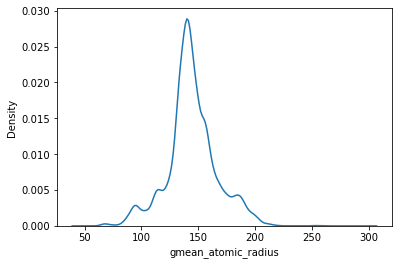

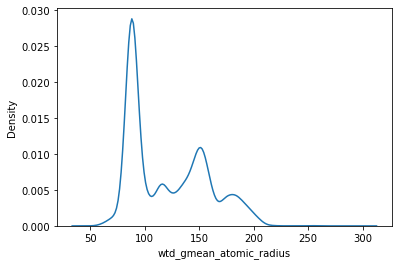

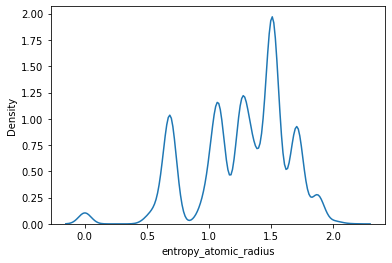

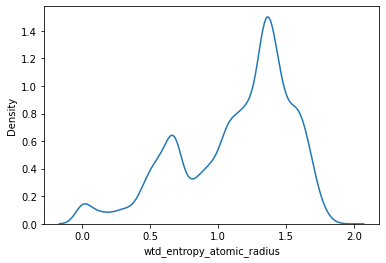

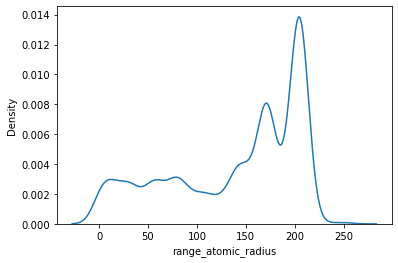

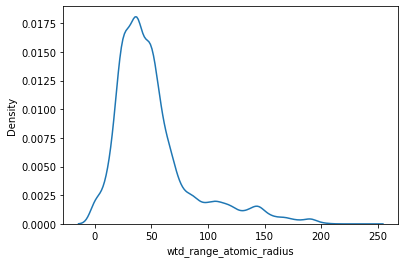

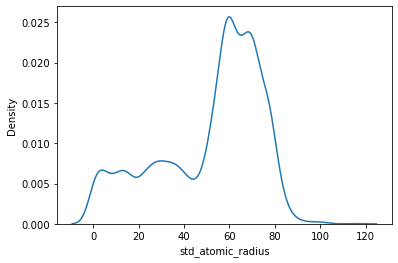

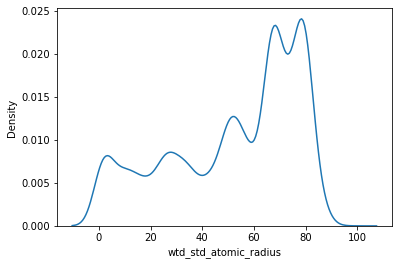

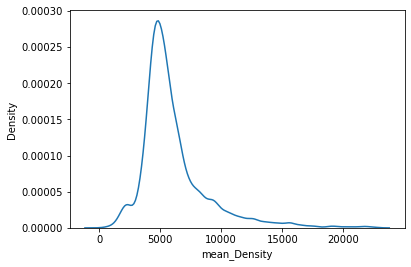

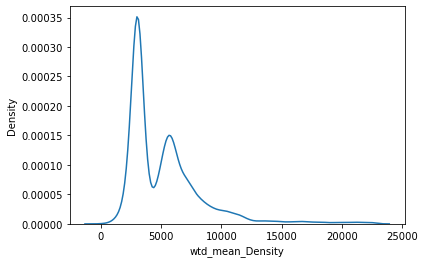

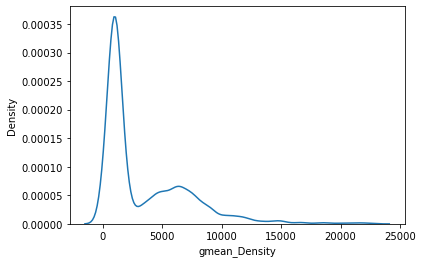

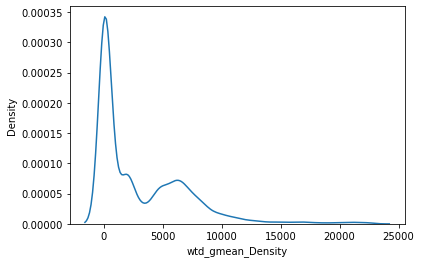

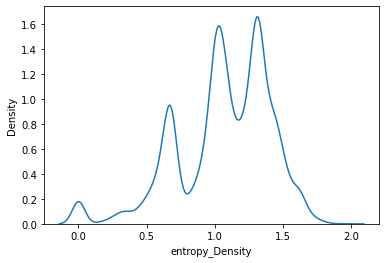

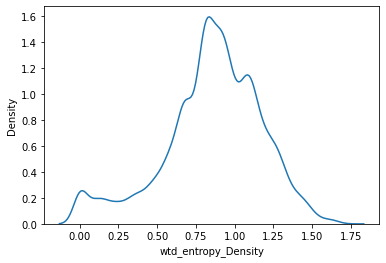

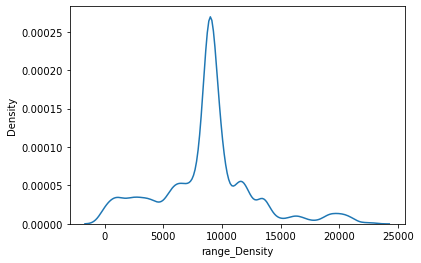

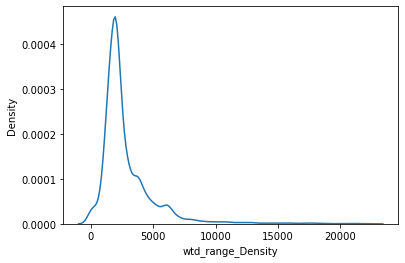

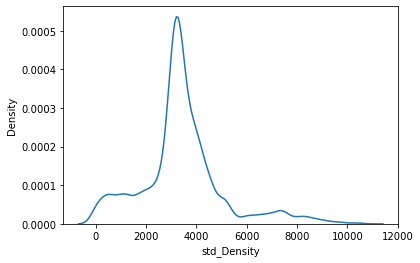

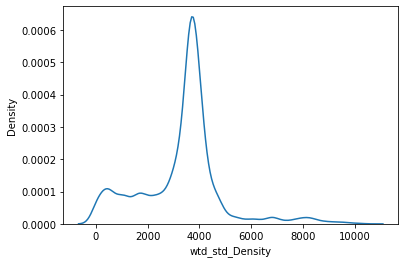

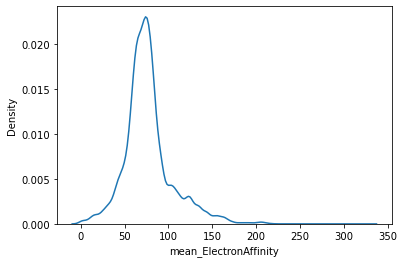

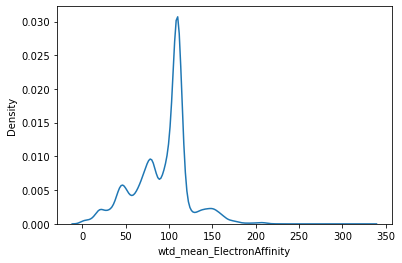

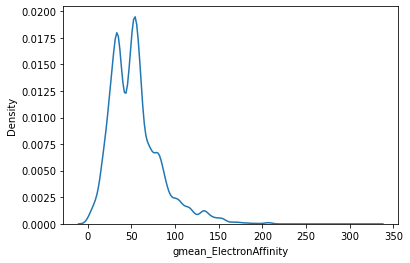

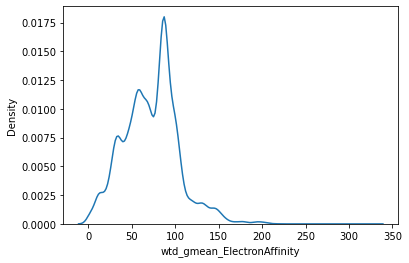

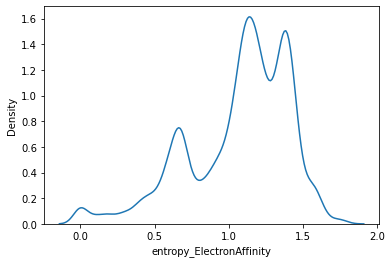

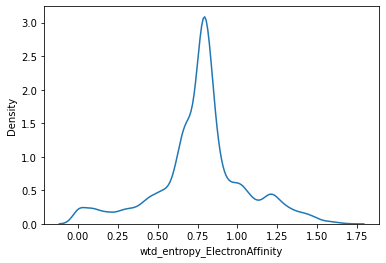

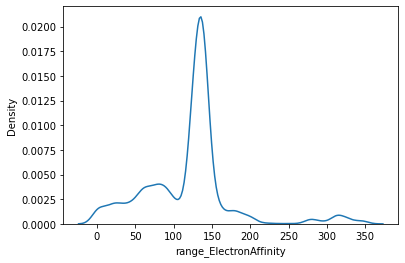

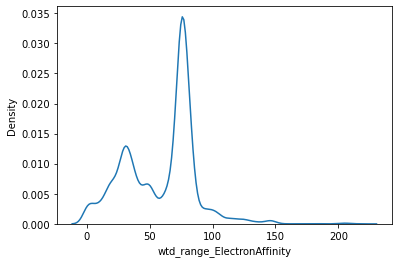

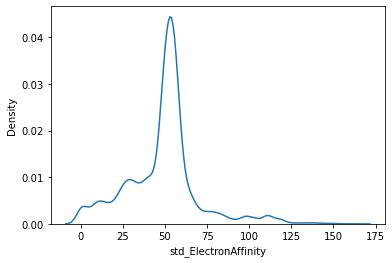

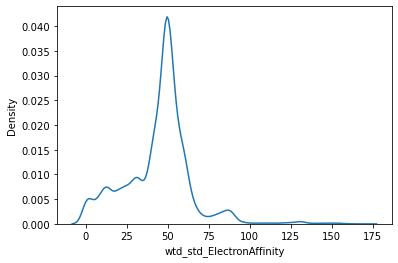

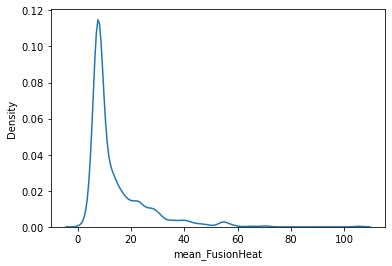

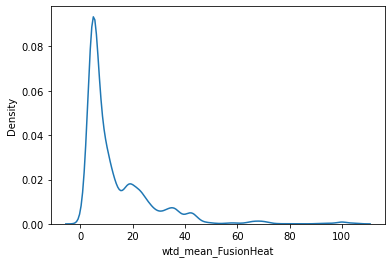

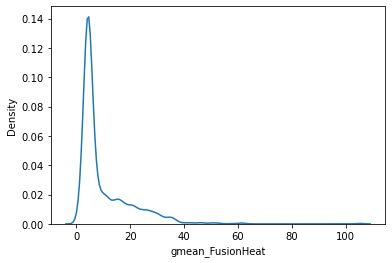

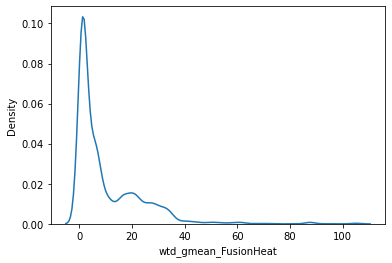

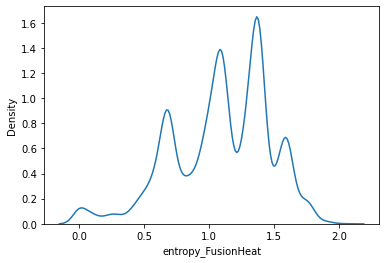

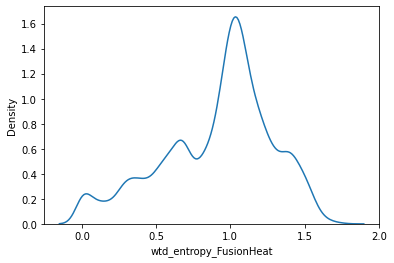

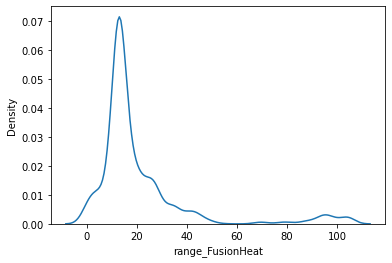

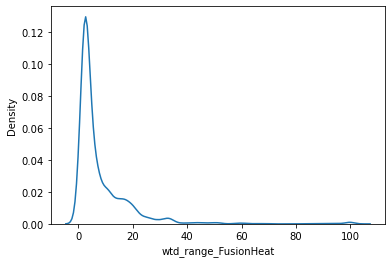

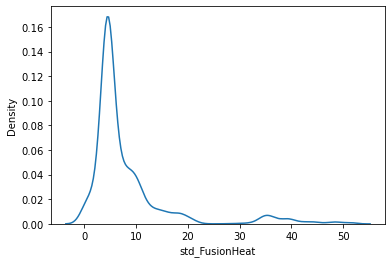

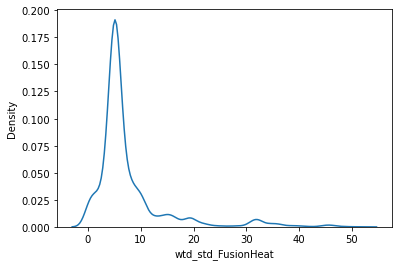

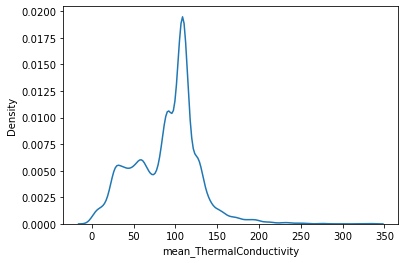

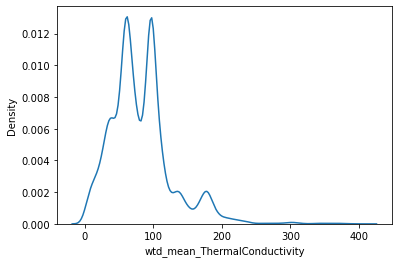

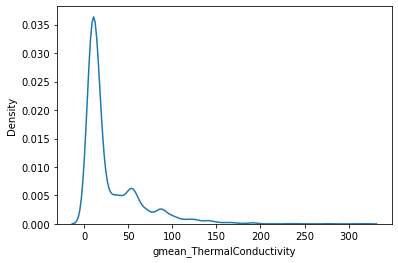

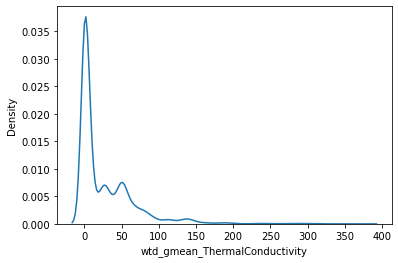

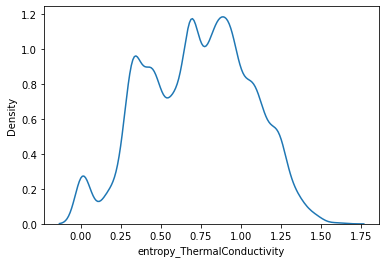

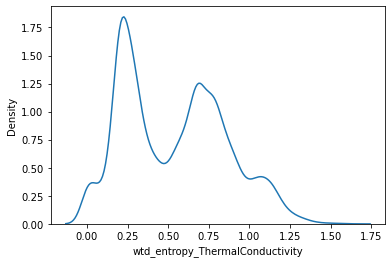

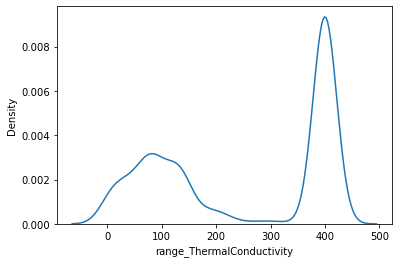

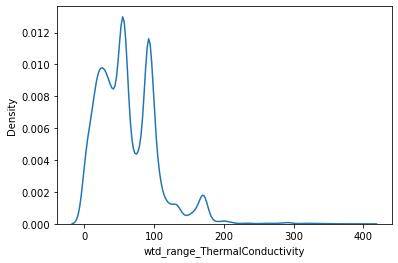

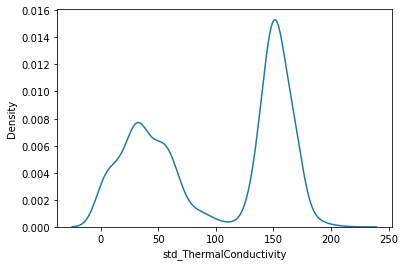

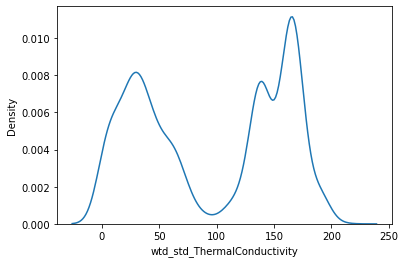

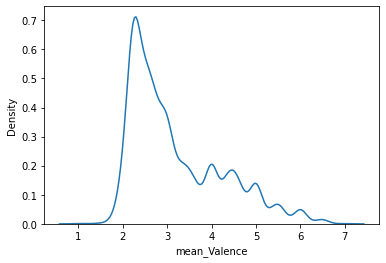

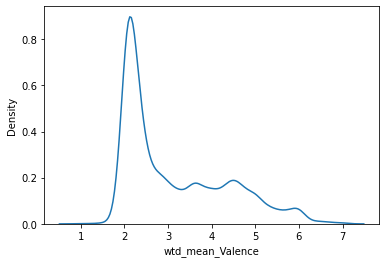

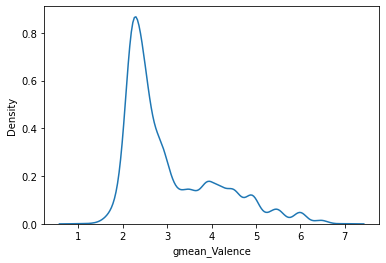

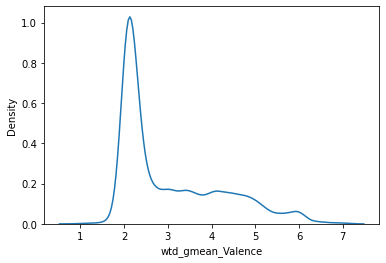

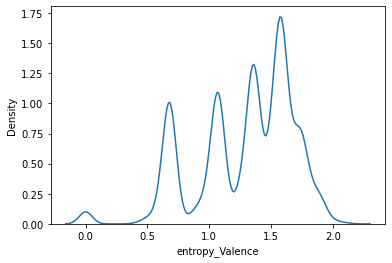

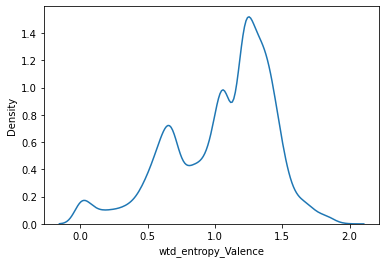

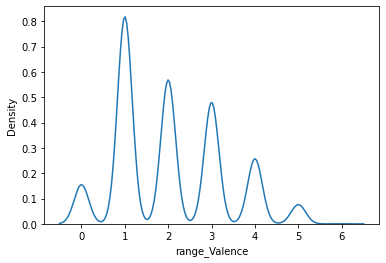

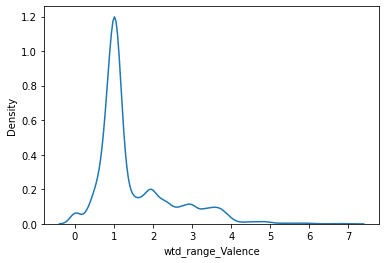

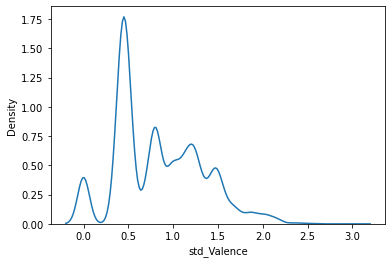

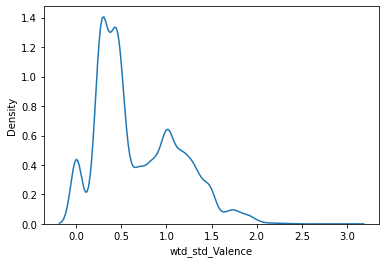

In [9]:
for i in X.columns:
    sns.kdeplot(X[i])
    plt.show()

#### Applied log transformation to the features below:

In [10]:
log_columns = ['mean_atomic_mass', 'wtd_mean_atomic_mass','gmean_atomic_mass',
               'wtd_gmean_atomic_mass','wtd_mean_fie','wtd_mean_atomic_radius',
               'gmean_atomic_radius','gmean_Density','gmean_ElectronAffinity',
               'mean_FusionHeat','wtd_mean_FusionHeat','gmean_FusionHeat',
               'mean_Valence','wtd_mean_Valence','gmean_Valence']

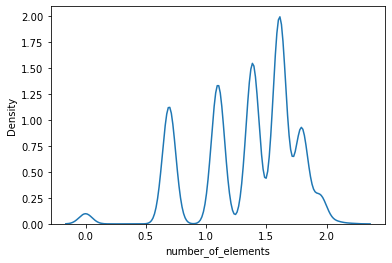

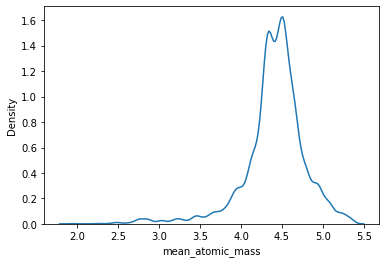

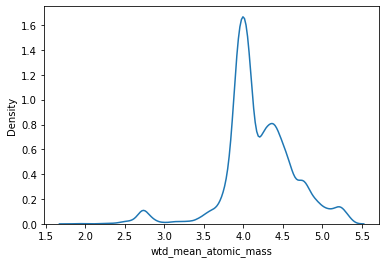

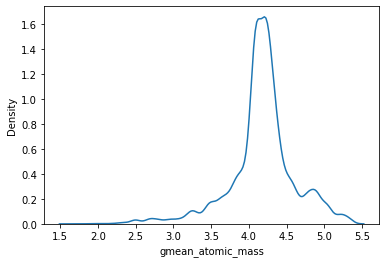

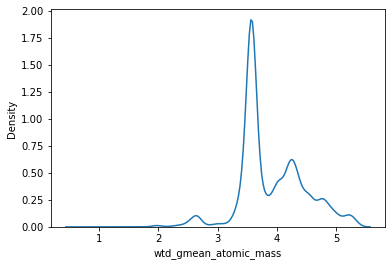

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


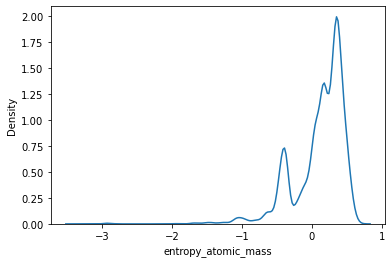

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


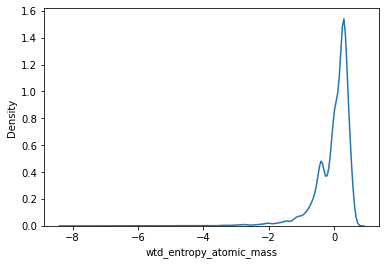

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


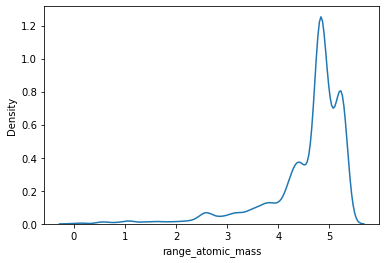

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


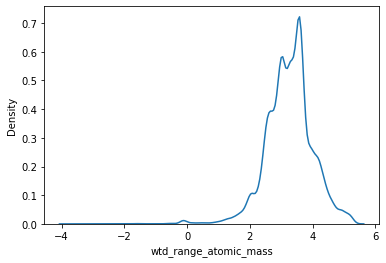

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


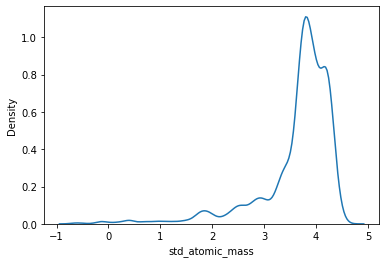

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


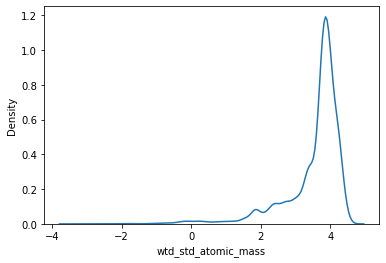

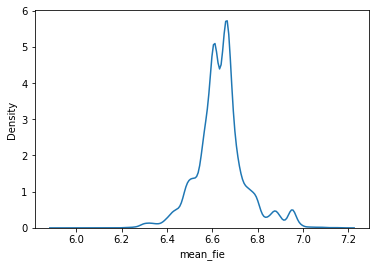

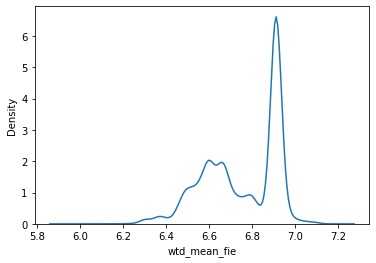

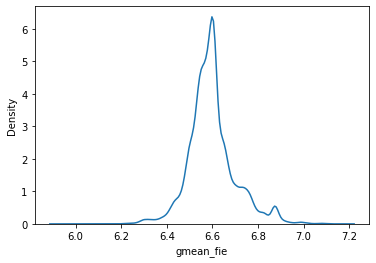

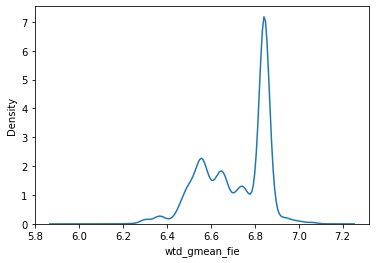

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


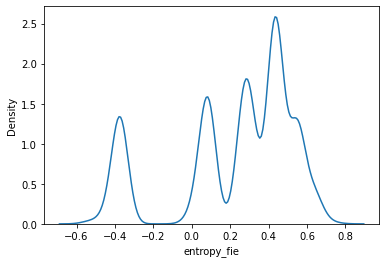

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


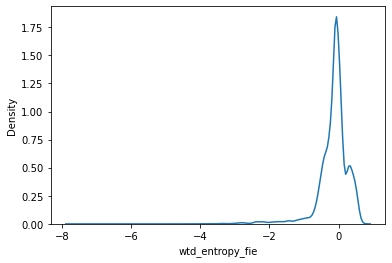

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


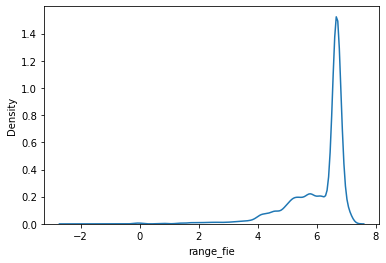

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


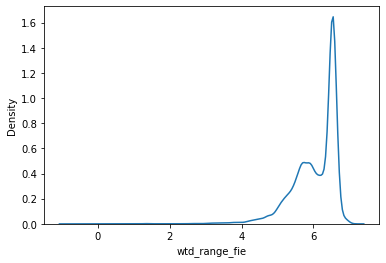

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


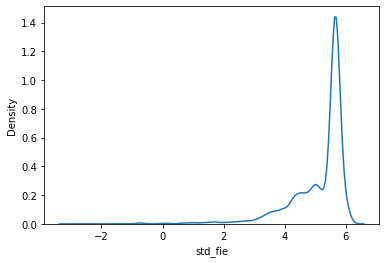

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


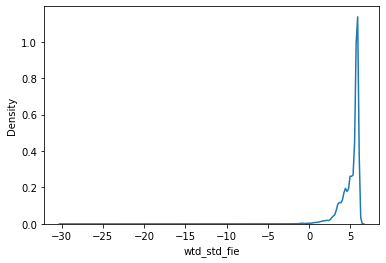

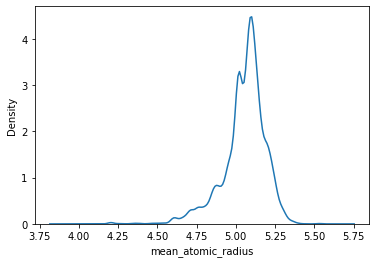

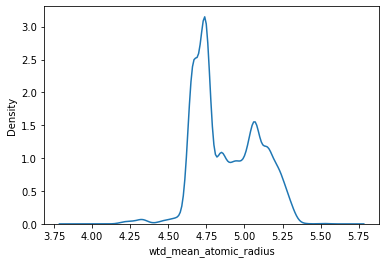

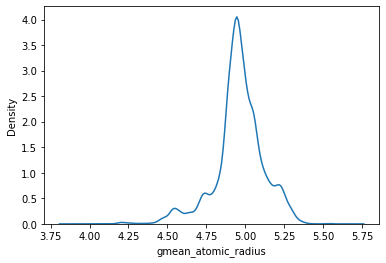

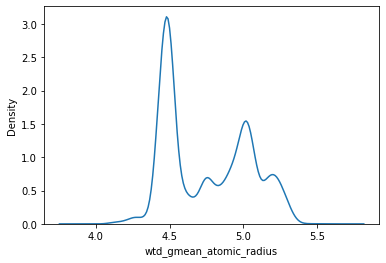

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


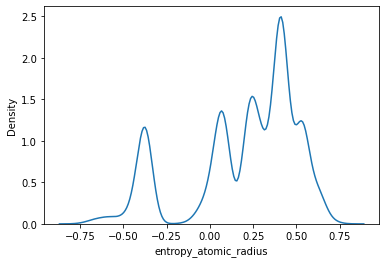

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


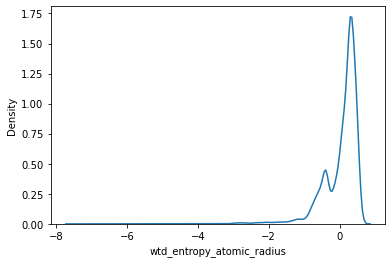

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


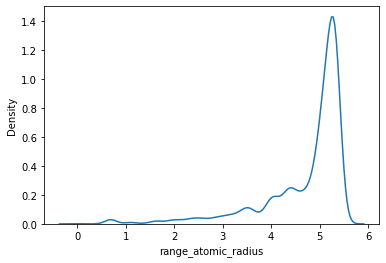

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


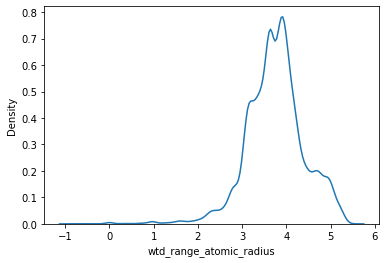

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


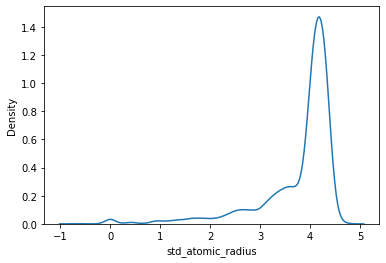

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


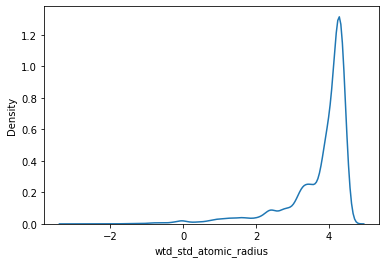

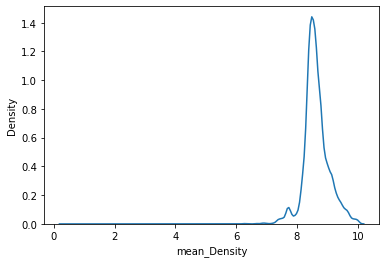

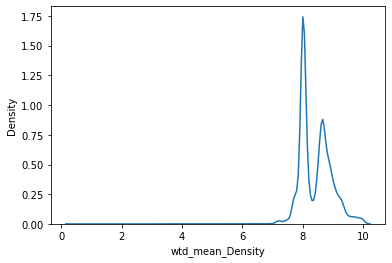

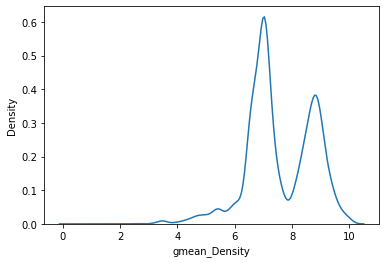

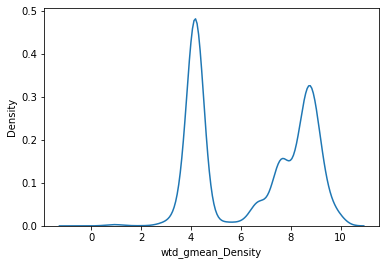

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


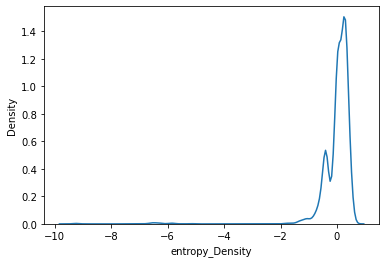

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


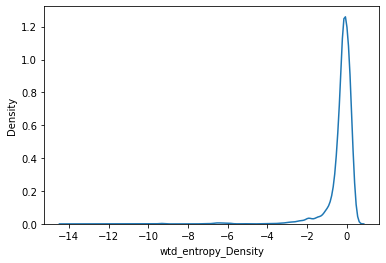

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


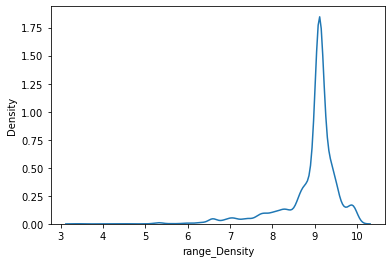

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


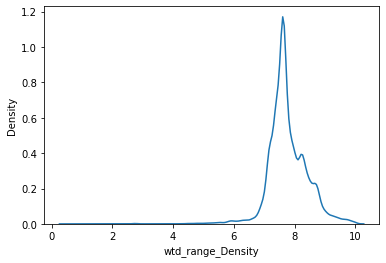

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


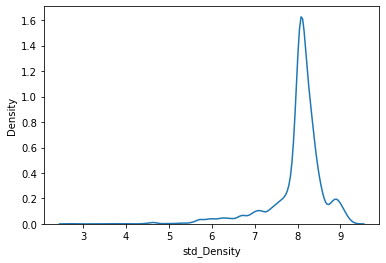

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


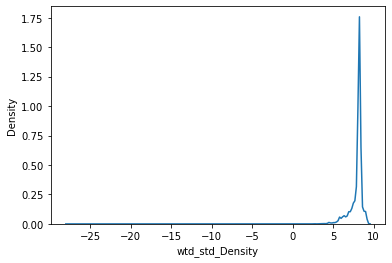

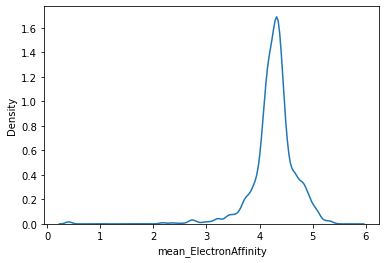

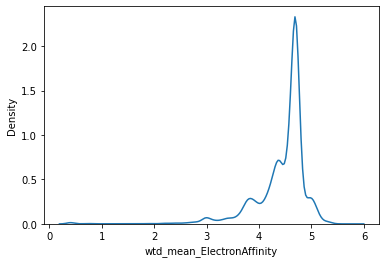

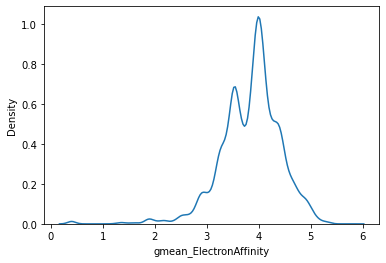

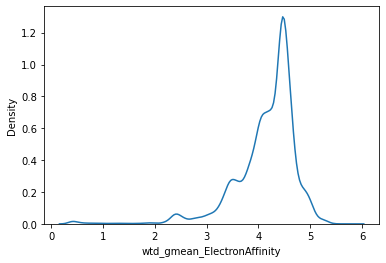

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


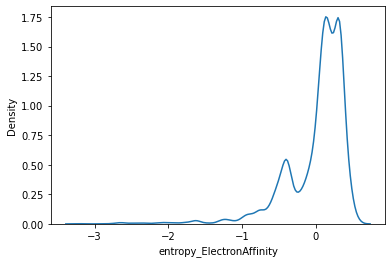

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


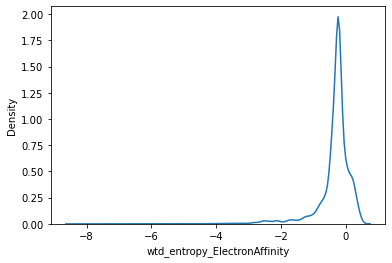

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


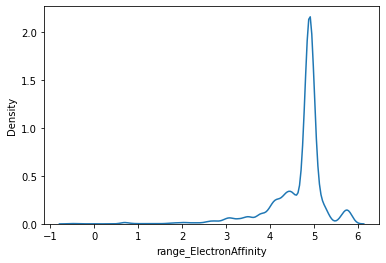

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


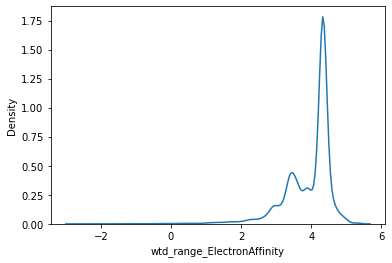

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


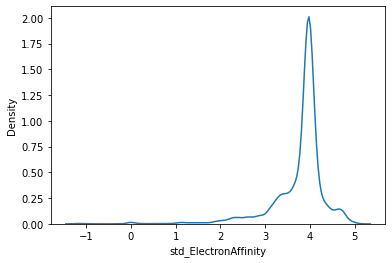

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


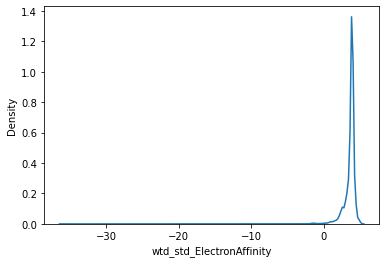

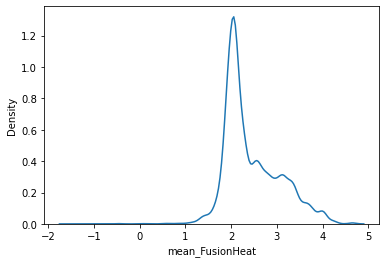

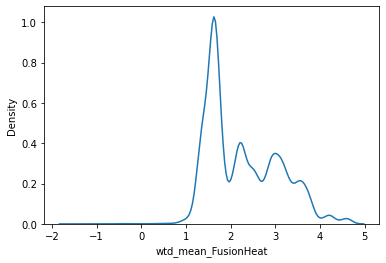

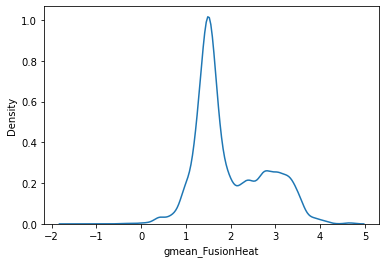

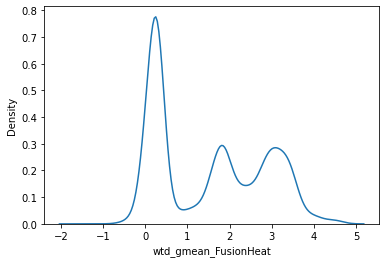

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


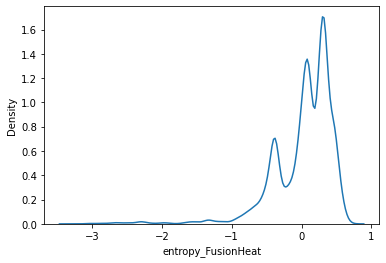

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


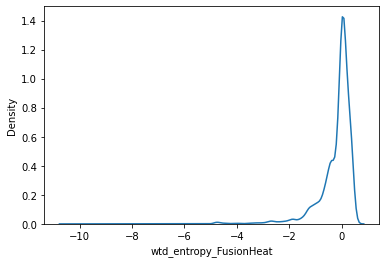

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


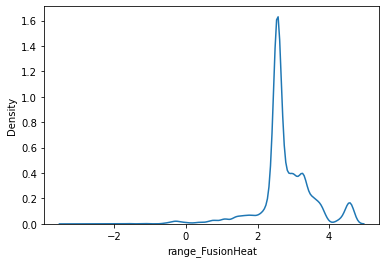

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


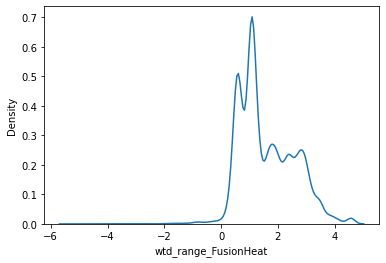

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


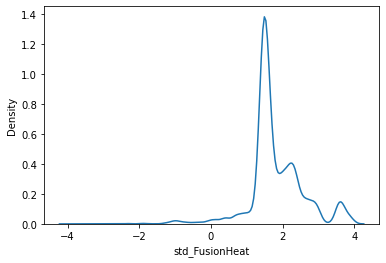

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


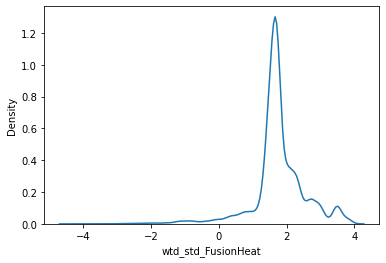

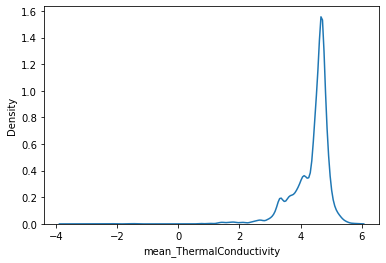

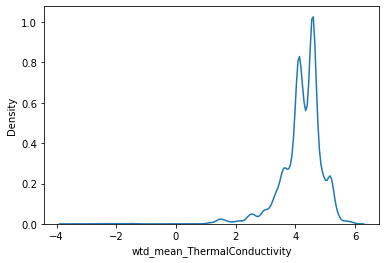

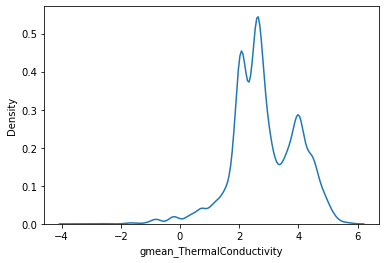

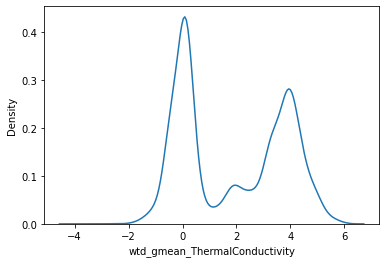

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


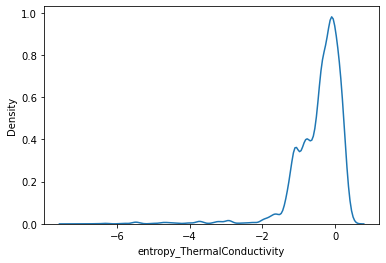

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


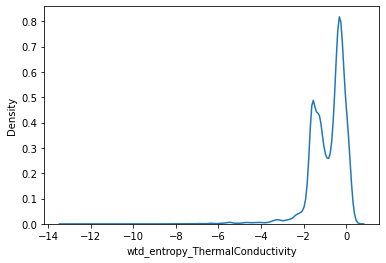

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


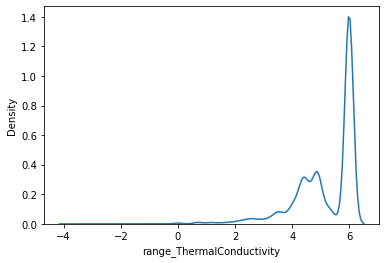

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


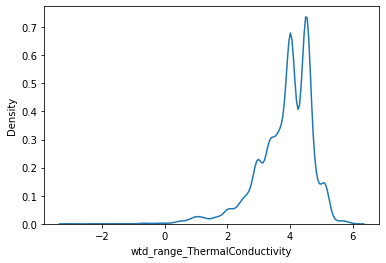

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


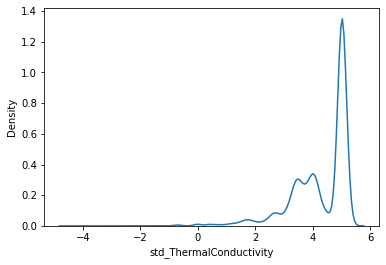

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


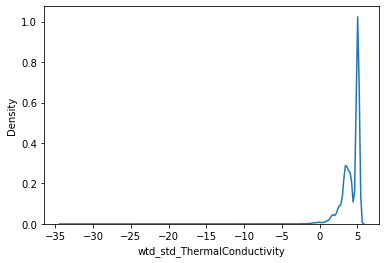

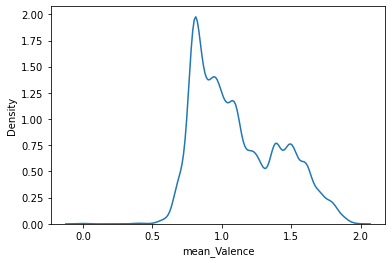

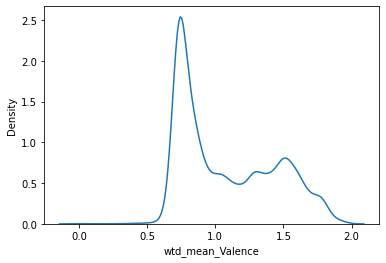

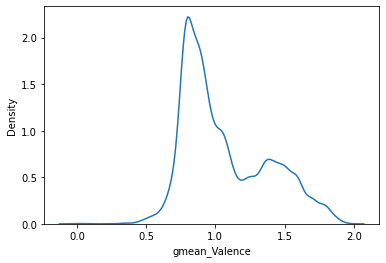

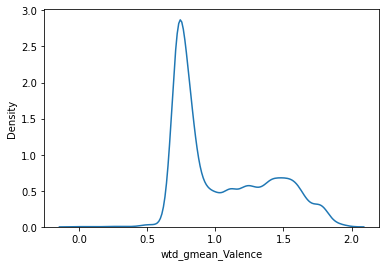

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


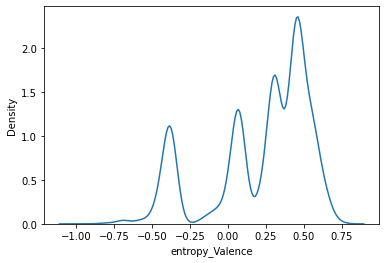

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


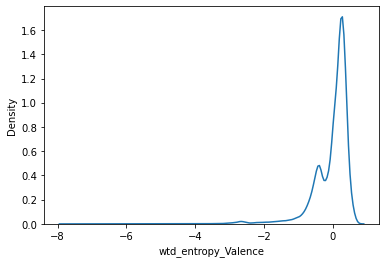

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


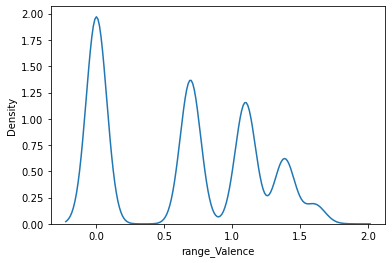

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


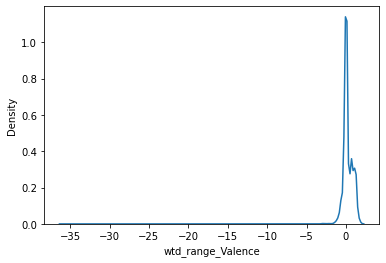

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


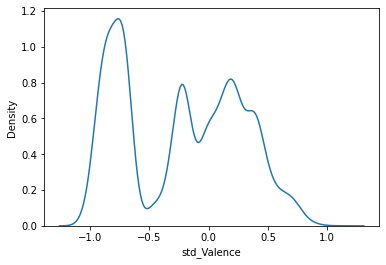

/Users/satvikajmera/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


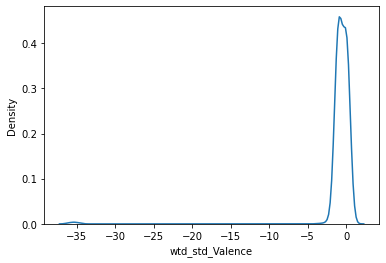

In [11]:
for i in X.columns:
    sns.kdeplot(np.log(X[i]))
    plt.show()

In [12]:
X_log = X.copy()

In [13]:
for i in log_columns:
    X_log[i] = np.log(X_log[i])  

In [14]:
X_log.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,4.408041,4.193608,4.175839,3.909878,1.165608,1.063884,115.601251,33.225218,44.391893,41.448045,769.614748,6.754648,737.474751,832.769649,1.299172,0.926726,572.222612,483.517264,215.631279,224.050033,157.983101,4.881083,4.960725,120.989330,1.267756,1.131138,139.325025,51.369885,51.601267,52.340465,6111.465214,5267.188547,7.557555,3117.241110,1.072425,0.856037,8665.438818,2902.736814,3416.910784,3319.170628,76.879751,92.717486,3.850509,72.416225,1.070250,0.770757,120.730514,59.332637,48.912207,44.409356,2.449864,2.267359,1.969905,10.141161,1.093343,0.914065,21.138994,8.218528,8.323333,7.717576,89.706911,81.549080,29.841727,27.308061,0.727630,0.539991,250.893443,62.033066,98.943993,96.234051,1.114709,1.083805,1.066448,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987
std,1.439295,0.384705,0.449782,0.442587,0.554380,0.364930,0.401423,54.626887,26.967752,20.035430,19.983544,87.488694,0.172040,78.327275,119.772520,0.381935,0.334018,309.614442,224.042874,109.966774,127.927104,20.147288,0.209118,0.158836,35.837843,0.375411,0.407159,67.272228,35.019356,22.898396,25.294524,2846.785185,3221.314506,1.166088,3975.122587,0.342356,0.319761,4097.126831,2398.471020,1673.624915,1611.799629,27.701890,32.276387,0.575438,31.648444,0.343391,0.285986,58.700327,28.620409,21.740521,20.429293,0.604667,0.801879,0.786275,13.134007,0.375

## Preprocessing using sklearn's StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
# X_scaled_df.head()

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_log = scaler.fit_transform(X_log)

In [18]:
# X_scaled_log_df = pd.DataFrame(X_scaled_log,columns=X_log.columns)
# X_scaled_log_df.head()

# Linear Regression

In [19]:
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics as mt

avg_mse = []

random_state = 123

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=random_state)
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

iter_num=0

for train_indices, test_indices in rkf.split(X_scaled,y): 
    X_train = X_scaled[train_indices]
    y_train = y[train_indices]
    
    X_test = X_scaled[test_indices]
    y_test = y[test_indices]
    lr.fit(X_train,y_train)  # train object

    y_hat = lr.predict(X_test) # get test set predictions
    mse = mt.mean_squared_error(y_test,y_hat)
    print("Iteration:",iter_num,"- MSE:", mse)
    avg_mse.append(mse)

    iter_num+=1
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")   
print('Average MSE over all the folds is:', mse)    

Iteration: 0 - MSE: 312.29319072704106
Iteration: 1 - MSE: 291.4404965226502
Iteration: 2 - MSE: 293.9579742846579
Iteration: 3 - MSE: 313.7503593834019
Iteration: 4 - MSE: 301.10355929953585
Iteration: 5 - MSE: 307.29353308782646
Iteration: 6 - MSE: 292.9977846980617
Iteration: 7 - MSE: 311.059353544635
Iteration: 8 - MSE: 342.00511317115433
Iteration: 9 - MSE: 340.6734323427866
Iteration: 10 - MSE: 294.5561265556928
Iteration: 11 - MSE: 315.688403884616
Iteration: 12 - MSE: 298.4021576690189
Iteration: 13 - MSE: 314.10519178477944
Iteration: 14 - MSE: 303.27227827115297
Iteration: 15 - MSE: 305.9001765019434
Iteration: 16 - MSE: 326.17695551611644
Iteration: 17 - MSE: 306.71297444966046
Iteration: 18 - MSE: 309.45694381678396
Iteration: 19 - MSE: 329.50414697939726
Iteration: 20 - MSE: 282.2543546059059
Iteration: 21 - MSE: 309.0534053256687
Iteration: 22 - MSE: 317.7269371007498
Iteration: 23 - MSE: 297.9731483717293
Iteration: 24 - MSE: 327.95385394700526
Iteration: 25 - MSE: 308.7

# Linear Regression - Log transformed 

In [20]:
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics as mt

random_state = 123

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=random_state)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
avg_mse_log = []
iter_num=0

for train_indices, test_indices in rkf.split(X_scaled_log,y): 
    X_train = X_scaled_log[train_indices]
    y_train = y[train_indices]
    
    X_test = X_scaled_log[test_indices]
    y_test = y[test_indices]
    lr.fit(X_train,y_train)

    y_hat = lr.predict(X_test)
    mse = mt.mean_squared_error(y_test,y_hat)
    print("Iteration:",iter_num,"- MSE:", mse)
    avg_mse_log.append(mse)

    iter_num+=1
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")   
print('Average MSE for Scaled and Log Transformed features over all the folds is:', np.mean(avg_mse_log))   

Iteration: 0 - MSE: 316.78884819243854
Iteration: 1 - MSE: 294.6400013985665
Iteration: 2 - MSE: 298.1472046679628
Iteration: 3 - MSE: 313.1454245696802
Iteration: 4 - MSE: 304.74925375299114
Iteration: 5 - MSE: 310.2004470569859
Iteration: 6 - MSE: 297.47891391606623
Iteration: 7 - MSE: 304.8058009565546
Iteration: 8 - MSE: 345.9662336547826
Iteration: 9 - MSE: 339.7857789736449
Iteration: 10 - MSE: 299.1649942691531
Iteration: 11 - MSE: 314.78885134086295
Iteration: 12 - MSE: 303.78139085144824
Iteration: 13 - MSE: 312.5301635548971
Iteration: 14 - MSE: 304.9384582335386
Iteration: 15 - MSE: 308.68495065880444
Iteration: 16 - MSE: 328.7631724547579
Iteration: 17 - MSE: 306.67853909390163
Iteration: 18 - MSE: 312.0193189624613
Iteration: 19 - MSE: 332.0362497465234
Iteration: 20 - MSE: 283.6187222134541
Iteration: 21 - MSE: 312.48477014570045
Iteration: 22 - MSE: 318.7625508330301
Iteration: 23 - MSE: 301.3335823958916
Iteration: 24 - MSE: 333.17462359665393
Iteration: 25 - MSE: 308.4

In [21]:
lr_coef_data = {"Coefficient_Name": X.columns, "Weights": lr.coef_}
lr_weights = pd.DataFrame(lr_coef_data)
lr_weights["abs_weights"] = np.abs(lr_weights["Weights"])

## Linear Regression Top 8 Weights

In [22]:
lr_weights.sort_values(by="abs_weights", ascending=False).head(8)

,Coefficient_Name,Weights,abs_weights
15,entropy_fie,-74.911751,74.911751
25,entropy_atomic_radius,41.256953,41.256953
75,entropy_Valence,37.374430,37.374430
22,wtd_mean_atomic_radius,30.585751,30.585751
76,wtd_entropy_Valence,-27.510452,27.510452
72,wtd_mean_Valence,-25.705444,25.705444
49,std_ElectronAffinity,24.904485,24.904485
24,wtd_gmean_atomic_radius,-23.984888,23.984888


# L1 - Lasso Regularization

Tested alphas:
- alpha = 0.08 - MSE = 334.2
- alpha = 0.2 - MSE = 357.36
- alpha = 0.5 - MSE = 381.32
- alpha = 0.7 - MSE = 391.86

In [23]:
from sklearn.linear_model import Lasso
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=random_state)

las = Lasso(alpha = 0.08)

avg_mse_log = []

iter_num=0

for train_indices, test_indices in rkf.split(X_scaled_log,y): 
    X_train = X_scaled_log[train_indices]
    y_train = y[train_indices]
    
    X_test = X_scaled_log[test_indices]
    y_test = y[test_indices]
    las.fit(X_train,y_train)

    y_hat = las.predict(X_test)
    mse = mt.mean_squared_error(y_test,y_hat)
    print("Iteration:",iter_num,"- MSE:", mse)
    avg_mse_log.append(mse)

    iter_num+=1
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")   
print('Lasso Regularization (L1) - Average MSE for Scaled, Log Transformed features over all the folds is:', np.mean(avg_mse_log))   

Iteration: 0 - MSE: 343.21499808439785
Iteration: 1 - MSE: 312.7707054998889
Iteration: 2 - MSE: 323.81656480279213
Iteration: 3 - MSE: 329.514212421941
Iteration: 4 - MSE: 329.0680578127013
Iteration: 5 - MSE: 330.71753984086365
Iteration: 6 - MSE: 317.5753958148268
Iteration: 7 - MSE: 324.70094482637666
Iteration: 8 - MSE: 369.80838477450976
Iteration: 9 - MSE: 363.0760071433379
Iteration: 10 - MSE: 320.7395779736005
Iteration: 11 - MSE: 334.00835565762804
Iteration: 12 - MSE: 328.9051137904212
Iteration: 13 - MSE: 338.5303982823398
Iteration: 14 - MSE: 323.1498994983269
Iteration: 15 - MSE: 330.305849640782
Iteration: 16 - MSE: 348.4851579481061
Iteration: 17 - MSE: 327.25162803058936
Iteration: 18 - MSE: 333.89456468881616
Iteration: 19 - MSE: 356.5607419099912
Iteration: 20 - MSE: 310.23573968823524
Iteration: 21 - MSE: 329.353701949931
Iteration: 22 - MSE: 339.5661394774981
Iteration: 23 - MSE: 319.2129868385446
Iteration: 24 - MSE: 356.778742824573
Iteration: 25 - MSE: 327.71897

In [24]:
lasso_coef_data = {"Coefficient_Name": X.columns, "Weights": las.coef_}
lasso_weights = pd.DataFrame(lasso_coef_data)
lasso_weights["abs_weights"] = np.abs(lasso_weights["Weights"])

## (L1) Lasso Regression Top 8 Weights (Alpha  = 0.08)

In [25]:
lasso_weights.sort_values(by="abs_weights", ascending=False).head(8)

,Coefficient_Name,Weights,abs_weights
62,wtd_mean_ThermalConductivity,16.452986,16.452986
49,std_ElectronAffinity,14.416946,14.416946
64,wtd_gmean_ThermalConductivity,-12.117712,12.117712
47,range_ElectronAffinity,-11.680374,11.680374
27,range_atomic_radius,11.043170,11.043170
7,range_atomic_mass,9.648559,9.648559
6,wtd_entropy_atomic_mass,8.238087,8.238087
22,wtd_mean_atomic_radius,7.857995,7.857995


# L2  - Ridge Regression

Tested alphas
- alpha = 0.9 - MSE = 312.41
- alpha = 0.7 - MSE = 312.39
- alpha = 0.5 - MSE = 312.37
- alpha = 0.3 - MSE = 312.35
- alpha = 0.1 - MSE =312.35

In [26]:
from sklearn.linear_model import Ridge
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=random_state)

ridge = Ridge(alpha = 0.3)

avg_mse_ridge = []
iter_num=0

for train_indices, test_indices in rkf.split(X_scaled_log,y): 
    X_train = X_scaled_log[train_indices]
    y_train = y[train_indices]
    
    X_test = X_scaled_log[test_indices]
    y_test = y[test_indices]
    ridge.fit(X_train,y_train)

    y_hat = ridge.predict(X_test)
    mse = mt.mean_squared_error(y_test,y_hat)
    print("Iteration:",iter_num,"- MSE:", mse)
    avg_mse_ridge.append(mse)

    iter_num+=1
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")   
print('Ridge Regularization - Average MSE for Scaled and Log Transformed features over all the folds is:', np.mean(avg_mse_ridge)) 

Iteration: 0 - MSE: 316.8374427041915
Iteration: 1 - MSE: 294.60299637683886
Iteration: 2 - MSE: 298.11736788583136
Iteration: 3 - MSE: 313.01805375424755
Iteration: 4 - MSE: 304.9091393253877
Iteration: 5 - MSE: 310.18522907743824
Iteration: 6 - MSE: 297.4926143581155
Iteration: 7 - MSE: 304.6746030013164
Iteration: 8 - MSE: 346.1460037819561
Iteration: 9 - MSE: 339.688065905483
Iteration: 10 - MSE: 299.2142693992457
Iteration: 11 - MSE: 314.66157024768586
Iteration: 12 - MSE: 303.9859029316189
Iteration: 13 - MSE: 312.5074298354326
Iteration: 14 - MSE: 304.9556593429769
Iteration: 15 - MSE: 308.3380852003397
Iteration: 16 - MSE: 328.5467314011986
Iteration: 17 - MSE: 306.7243066768059
Iteration: 18 - MSE: 312.0729842033774
Iteration: 19 - MSE: 332.3245573761021
Iteration: 20 - MSE: 283.5411743569774
Iteration: 21 - MSE: 312.41953296200165
Iteration: 22 - MSE: 318.6889674085449
Iteration: 23 - MSE: 301.41543143510887
Iteration: 24 - MSE: 333.0743110932091
Iteration: 25 - MSE: 308.3688

In [27]:
ridge_coef_data = {"Coefficient_Name": X.columns, "Weights": ridge.coef_}
ridge_weights = pd.DataFrame(ridge_coef_data)
ridge_weights["abs_weights"] = np.abs(ridge_weights["Weights"])

## (L2) Ridge Regression Top 8 Weights (Alpha  = 0.3)

In [28]:
ridge_weights.sort_values(by="abs_weights", ascending=False).head(8)

,Coefficient_Name,Weights,abs_weights
15,entropy_fie,-63.473831,63.473831
25,entropy_atomic_radius,36.551041,36.551041
75,entropy_Valence,30.807587,30.807587
22,wtd_mean_atomic_radius,29.642783,29.642783
76,wtd_entropy_Valence,-27.065413,27.065413
72,wtd_mean_Valence,-25.309781,25.309781
49,std_ElectronAffinity,24.769150,24.769150
24,wtd_gmean_atomic_radius,-23.081382,23.081382
